In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import datetime as dt
from dateutil import parser
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.pyplot import rcParams

In [ ]:
# toplam 96454 veri var
data = pd.read_csv("/content/weatherHistory.csv")
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
# datatype kontrol edelim
data.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [ ]:
categorical = data.select_dtypes(include = ["object"]).keys()
print(categorical)

Index(['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'], dtype='object')


In [ ]:
quantitative = data.select_dtypes(include = ["int64","float64"]).keys()
print(quantitative)

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Loud Cover', 'Pressure (millibars)'],
      dtype='object')


In [ ]:
#Tarihleri düzenleme '+0200' sıkıntı yarattığı için orayı veri setinden çıkarıp öyle düzenledik:

data['Date'] = pd.to_datetime(data['Formatted Date'].str[:-6], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [ ]:
#Doğru dönüşüp dönüşmediğini kontrol ettik
print(data['Date'].dtype)

datetime64[ns]


In [ ]:
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['hour'] = data['Date'].dt.hour
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date,year,month,day,hour
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-04-01 00:00:00,2006,4,1,0
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-04-01 01:00:00,2006,4,1,1
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01 02:00:00,2006,4,1,2
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01 03:00:00,2006,4,1,3
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01 04:00:00,2006,4,1,4


<ipython-input-46-36a057762ca3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


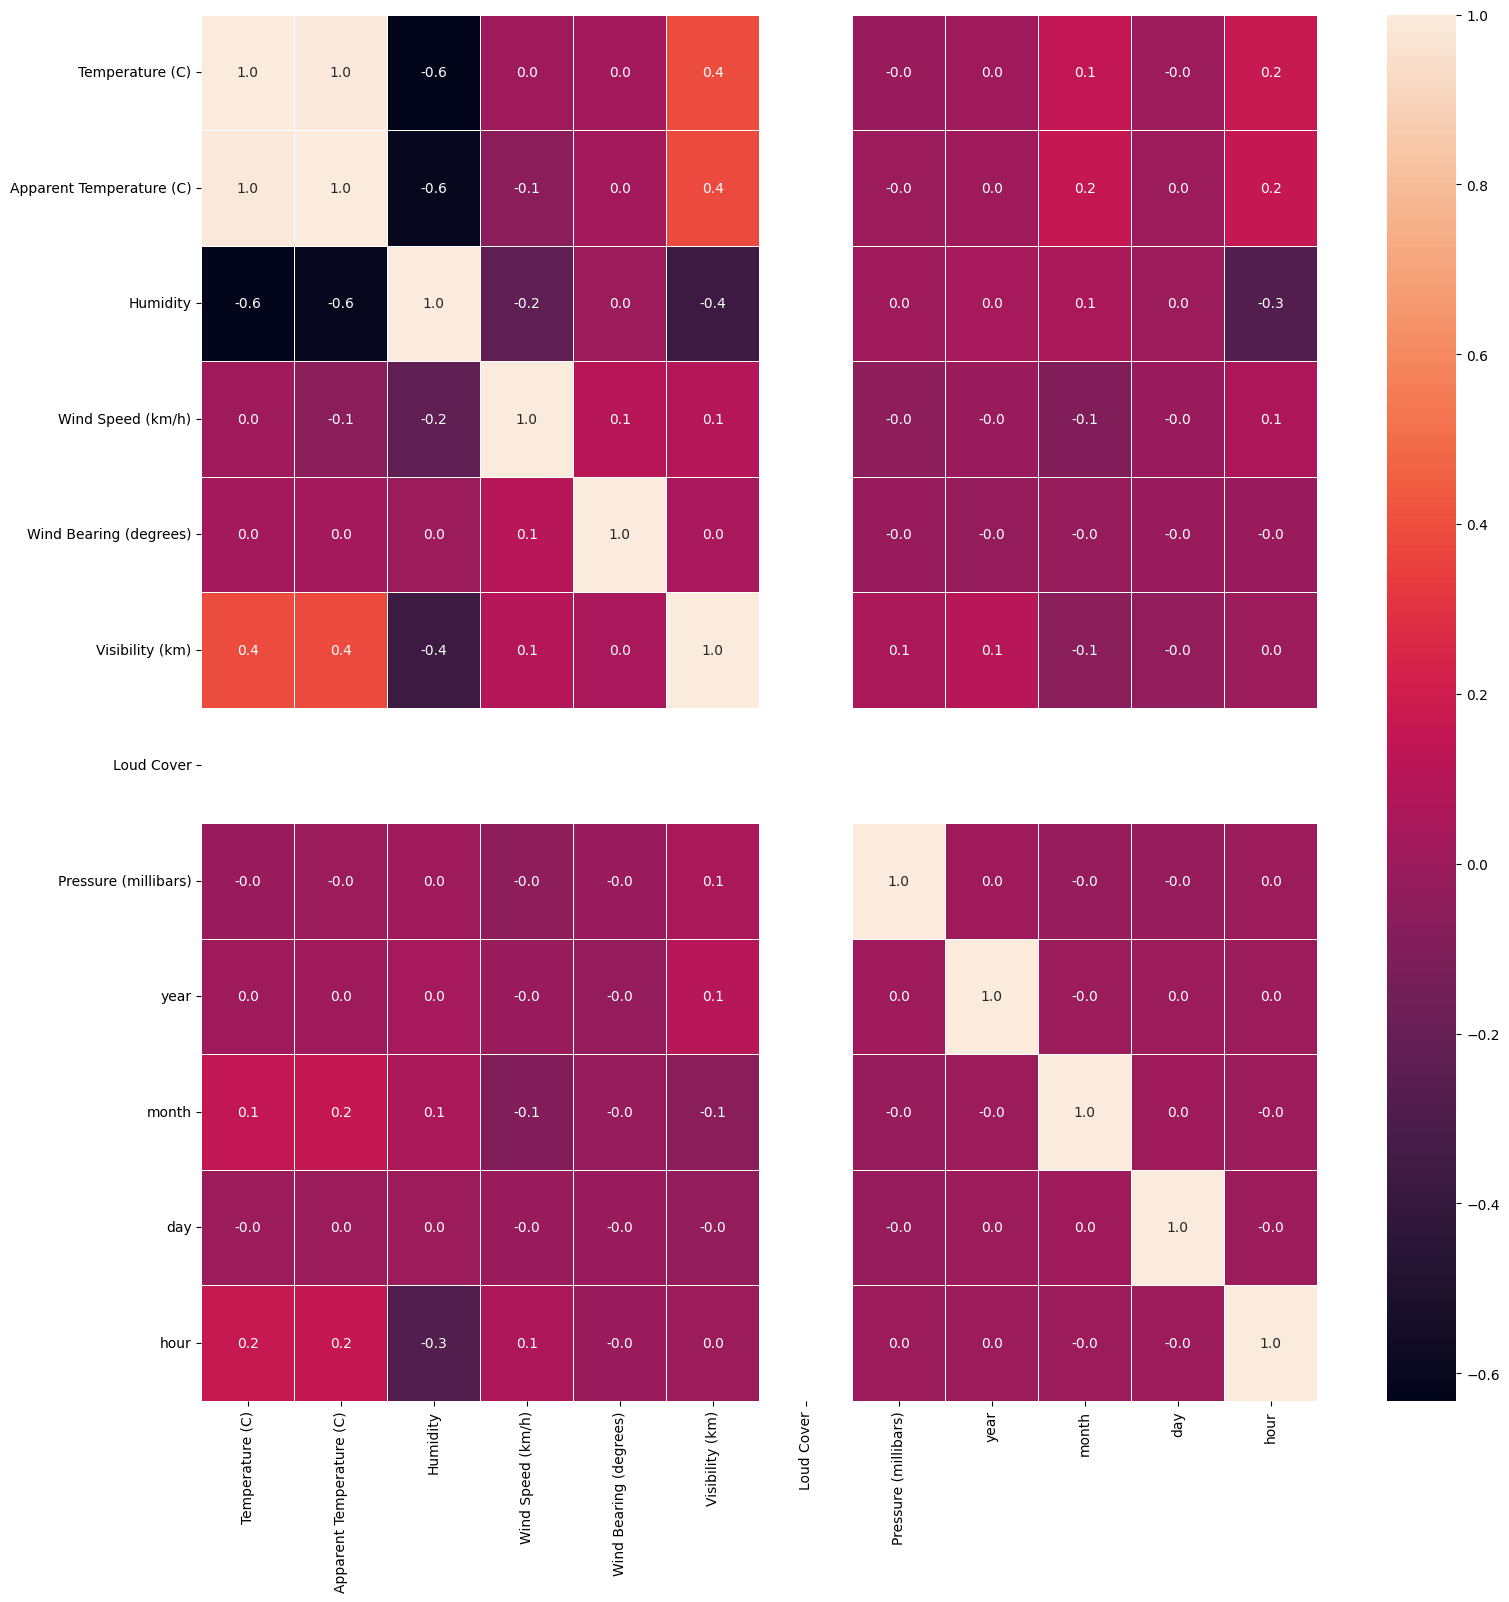

In [ ]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [ ]:
#quantative değerlerin bilgilerine bakalım ona göre düzenleme yapacağız
data[quantitative].describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


array([[<Axes: title={'center': 'Temperature (C)'}>,
        <Axes: title={'center': 'Apparent Temperature (C)'}>,
        <Axes: title={'center': 'Humidity'}>],
       [<Axes: title={'center': 'Wind Speed (km/h)'}>,
        <Axes: title={'center': 'Wind Bearing (degrees)'}>,
        <Axes: title={'center': 'Visibility (km)'}>],
       [<Axes: title={'center': 'Loud Cover'}>,
        <Axes: title={'center': 'Pressure (millibars)'}>, <Axes: >]],
      dtype=object)

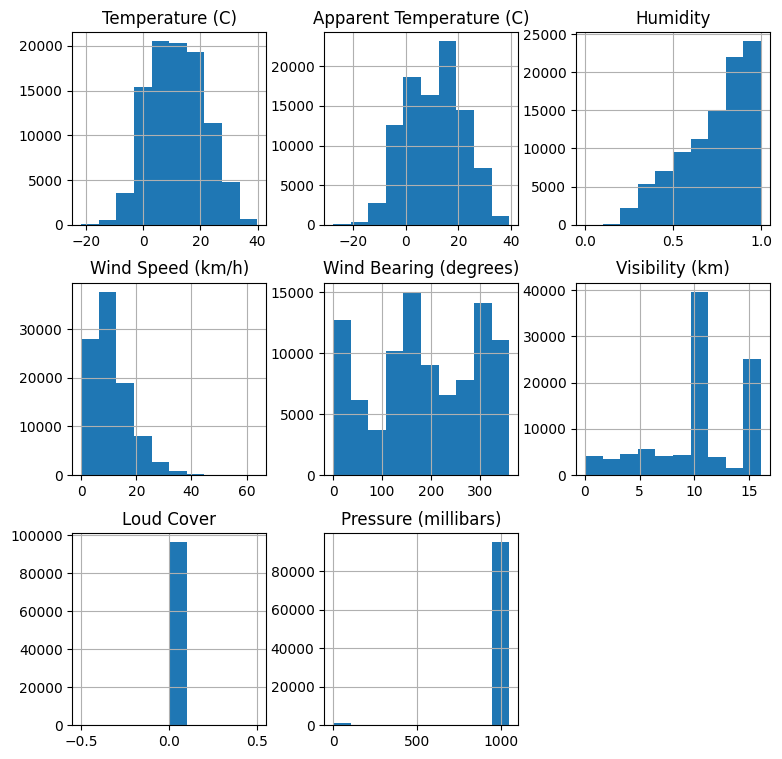

In [ ]:
#'Loud Cover' değerleri 0 döndüğü için onları sileceğiz
rcParams['figure.figsize'] = 9, 9
data[quantitative].hist()

In [ ]:
data=data.drop('Loud Cover',axis=1)

<Axes: >

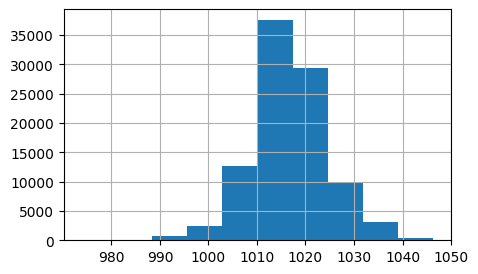

In [ ]:
#Ortalama ile doldurduk
pressure_median = data['Pressure (millibars)'].median()

def pressure(x):
    if x==0:
        return x + pressure_median
    else:
        return x

data["Pressure (millibars)"] = data.apply(lambda row:pressure(row["Pressure (millibars)"]) , axis = 1)

rcParams['figure.figsize'] = 5, 3
data['Pressure (millibars)'].hist()

<Axes: xlabel='count', ylabel='Summary'>

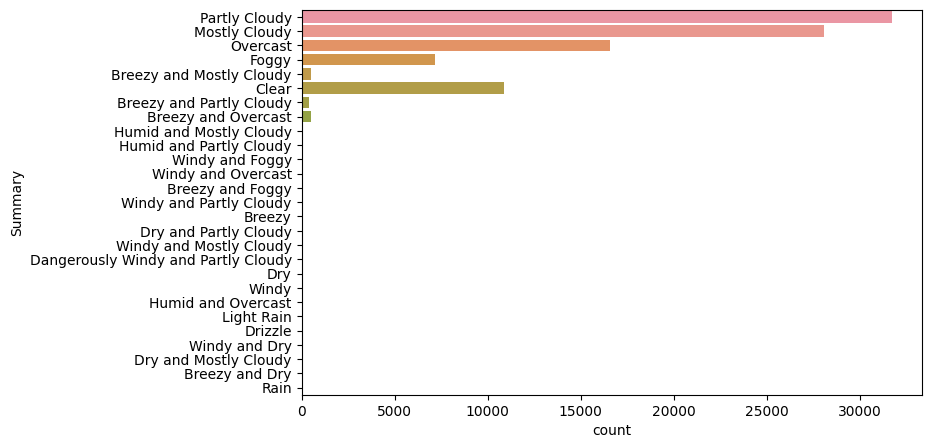

In [ ]:
rcParams['figure.figsize'] = 8, 5
sns.countplot(y=data['Summary'])

In [ ]:
data['Daily Summary'].value_counts(dropna=False)

Mostly cloudy throughout the day.                                                                       20085
Partly cloudy throughout the day.                                                                        9981
Partly cloudy until night.                                                                               6169
Partly cloudy starting in the morning.                                                                   5184
Foggy in the morning.                                                                                    4201
                                                                                                        ...  
Breezy starting overnight continuing until morning and foggy overnight.                                    24
Mostly cloudy throughout the day and breezy starting overnight continuing until afternoon.                 24
Partly cloudy starting in the morning and breezy starting in the afternoon continuing until evening.       24
Rain until

In [ ]:
data['Summary'].value_counts(dropna=False)

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [ ]:
#Boş değerleri doldurmamız gerekicek
data['Precip Type'].value_counts(dropna=False)

rain    85224
snow    10712
NaN       517
Name: Precip Type, dtype: int64

In [ ]:
#object olduğu için mean ve median kullanamıyoruz bu yüzden ffill ile yaparak bir önceki satırın değerleriyle dolduracağız
data.dropna()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Date,year,month,day,hour
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.,2006-04-01 00:00:00,2006,4,1,0
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.,2006-04-01 01:00:00,2006,4,1,1
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.,2006-04-01 02:00:00,2006,4,1,2
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.,2006-04-01 03:00:00,2006,4,1,3
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.,2006-04-01 04:00:00,2006,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,Partly cloudy starting in the morning.,2016-09-09 19:00:00,2016,9,9,19
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,Partly cloudy starting in the morning.,2016-09-09 20:00:00,2016,9,9,20
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,Partly cloudy starting in the morning.,2016-09-09 21:00:00,2016,9,9,21
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,Partly cloudy starting in the morning.,2016-09-09 22:00:00,2016,9,9,22


<Axes: xlabel='Precip Type', ylabel='count'>

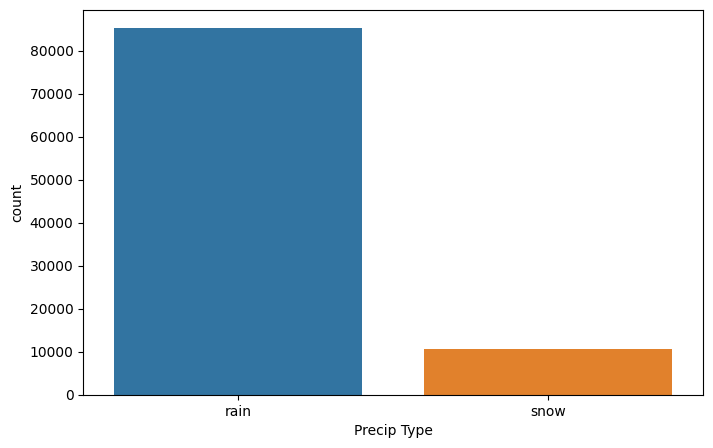

In [ ]:
sns.countplot(x=data['Precip Type'])

In [ ]:
totalCells = np.product(data.shape)
missingCount = data.isnull().sum()
totalMissing = missingCount.sum()
print("Hava durumu veri setinde", round(((totalMissing/totalCells) * 100), 2), "%", "kayıp veri değeri var.")

Hava durumu veri setinde 0.03 % kayıp veri değeri var.


<Figure size 1800x800 with 0 Axes>

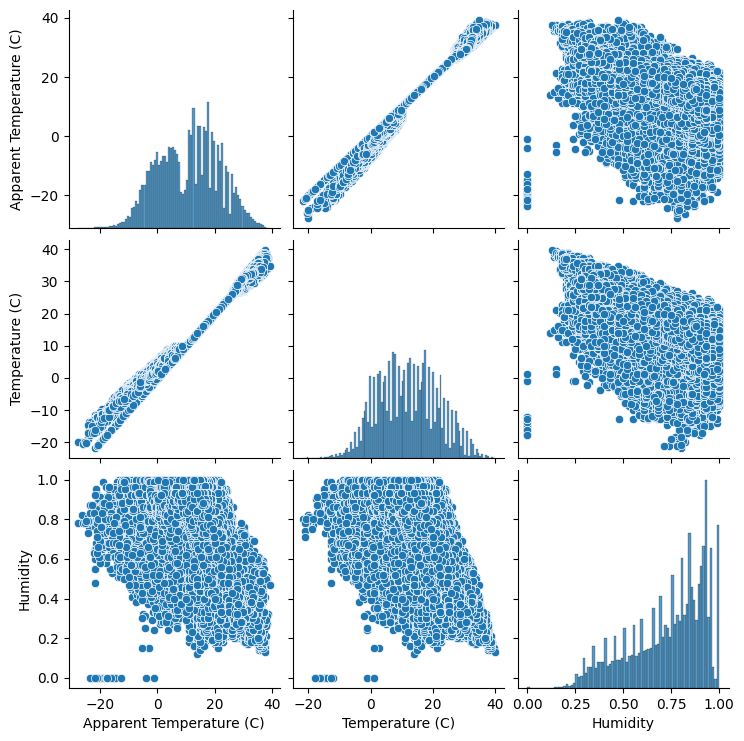

In [ ]:
plt.figure(figsize=(18,8))
sns.pairplot(data[['Apparent Temperature (C)','Temperature (C)', 'Humidity' ]])
plt.show()

<Figure size 1800x800 with 0 Axes>

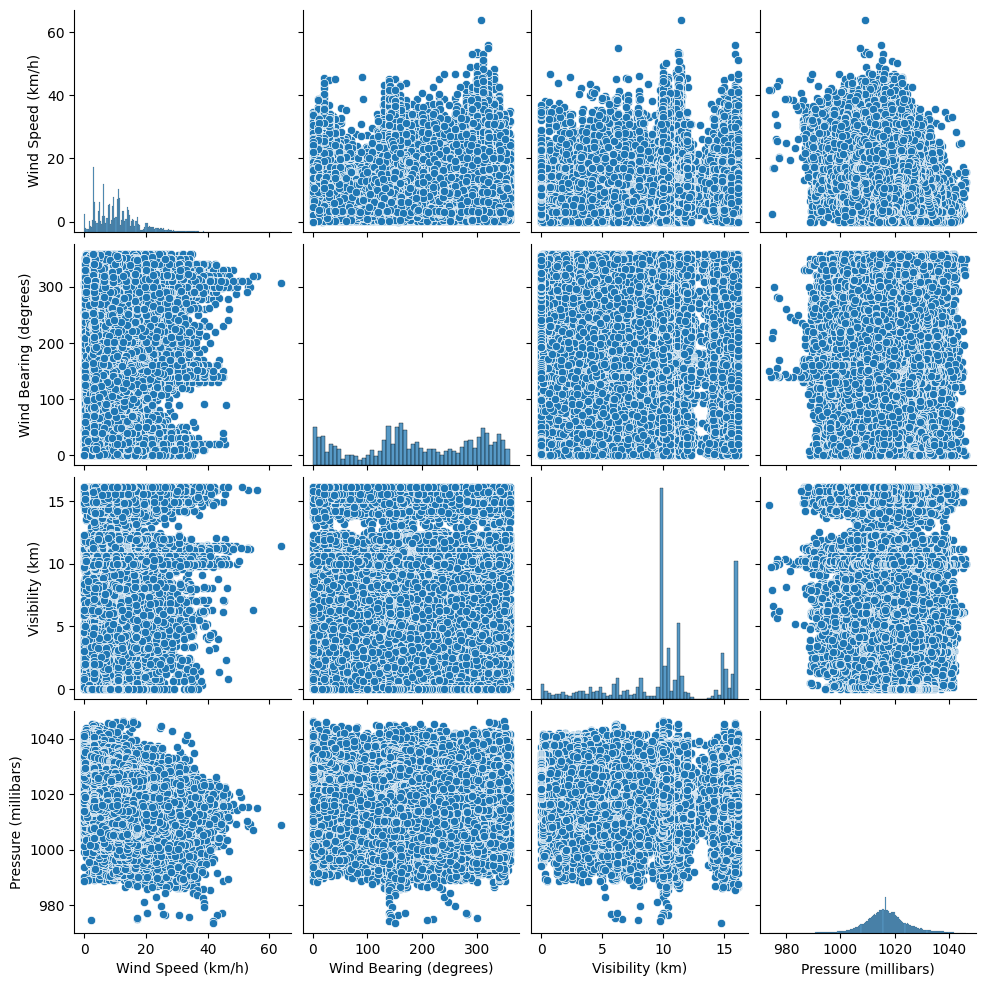

In [ ]:
plt.figure(figsize=(18,8))
sns.pairplot(data[['Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']])
plt.show()

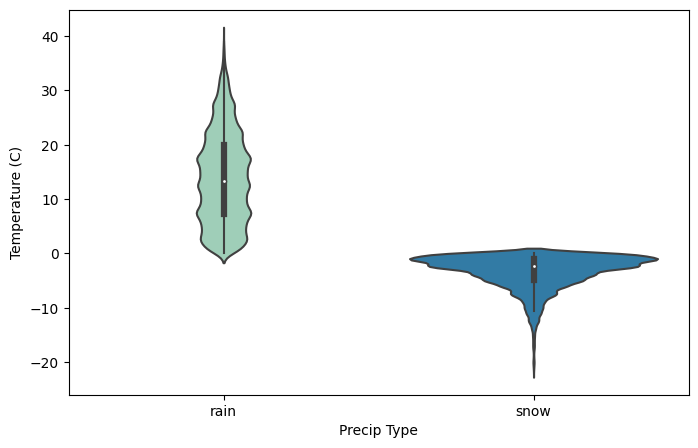

In [ ]:
sns.violinplot(x="Precip Type", y="Temperature (C)", data=data, palette="YlGnBu");

**Veri setindeki categorical verileri quantitative değerlere dönüştüreceğiz**

In [ ]:
def change_category_to_number(DailySummaryCat):
    if DailySummaryCat=='Partly cloudy throughout the day.':
        return 1
    elif DailySummaryCat=='Mostly cloudy throughout the day.':
        return 2
    elif DailySummaryCat=='Foggy in the evening.':
        return 3
    elif DailySummaryCat=='Foggy overnight and breezy in the morning.':
        return 4
    elif DailySummaryCat=='Overcast throughout the day.':
        return 5
    elif DailySummaryCat=='Partly cloudy until night.':
        return 6
    elif DailySummaryCat=='Motly cloudy until night.':
        return 7
    elif DailySummaryCat=='Foggy starting overnight continuing until morning.':
        return 8
    elif DailySummaryCat=='Foggy in the morning.':
        return 9
    elif DailySummaryCat=='Partly cloudy until evening.':
        return 10
    elif DailySummaryCat=='Partly cloudy starting in the morning.':
        return 11
    elif DailySummaryCat=='Mostly cloudy starting overnight continuing until night.':
        return 12
    elif DailySummaryCat=='Partly cloudy starting in the afternoon.':
        return 13
    elif DailySummaryCat=='Partly cloudy starting overnight.':
        return 14
    elif DailySummaryCat=='Mostly cloudy starting overnight.':
        return 15
    elif DailySummaryCat=='Mostly cloudy until night and breezy in the afternoon.':
        return 16
    elif DailySummaryCat=='Mostly cloudy until evening.':
        return 17
    elif DailySummaryCat=='Foggy throughout the day.':
        return 18
    elif DailySummaryCat=='Partly cloudy starting in the morning.':
        return 19
    elif DailySummaryCat=='Partly cloudy starting in the morning continuing until evening.':
        return 20
    elif DailySummaryCat=='Foggy until morning.':
        return 21
    elif DailySummaryCat=='Partly cloudy starting in the morning continuing until night.':
        return 22
    elif DailySummaryCat=='Mostly cloudy starting in the morning.':
        return 23
    elif DailySummaryCat=='Foggy starting in the evening.':
        return 24
    elif DailySummaryCat=='Partly cloudy starting in the afternoon continuing until evening.':
        return 25
    elif DailySummaryCat=='Foggy overnight.':
        return 26
    elif DailySummaryCat=='Clear throughout the day.':
        return 27
    elif DailySummaryCat=='Partly cloudy starting overnight continuing until night.':
        return 28
    elif DailySummaryCat=='Partly cloudy overnight.':
        return 29
    elif DailySummaryCat=='Partly cloudy starting overnight continuing until evening.':
        return 30
    elif DailySummaryCat=='Foggy until night.':
        return 31
    elif DailySummaryCat=='Partly cloudy in the morning.':
        return 32
    elif DailySummaryCat=='Foggy starting overnight continuing until afternoon.':
        return 33
    elif DailySummaryCat=='Foggy until afternoon.':
        return 34
    elif DailySummaryCat=='Breezy and mostly cloudy overnight.':
        return 35
    elif DailySummaryCat=='Partly cloudy overnight and breezy starting in the morning continuing until afternoon.':
        return 36
    elif DailySummaryCat=='Breezy in the morning and foggy in the evening.':
        return 37
    elif DailySummaryCat=='Mostly cloudy until evening and breezy in the evening.':
        return 38
    elif DailySummaryCat=='Mostly cloudy starting in the evening.':
        return 39
    elif DailySummaryCat=='Mostly cloudy throughout the day and breezy starting overnight continuing until afternoon.':
        return 40
    elif DailySummaryCat=='Breezy starting in the morning continuing until night.':
        return 41
    elif DailySummaryCat=='Overcast throughout the day and breezy starting overnight continuing until morning.':
        return 42
    elif DailySummaryCat=='Breezy starting overnight continuing until morning and foggy in the evening.':
        return 43
    elif DailySummaryCat=='Light rain until morning.':
        return 44
    elif DailySummaryCat=='Mostly cloudy until night and breezy starting in the afternoon continuing until night.':
        return 45
    elif DailySummaryCat=='Mostly cloudy starting in the morning continuing until afternoon.':
        return 46
    elif DailySummaryCat=='Breezy until afternoon and overcast throughout the day.':
        return 47
    elif DailySummaryCat=='Partly cloudy until evening and breezy in the afternoon.':
        return 48
    elif DailySummaryCat=='Breezy starting overnight continuing until morning and partly cloudy starting overnight continuing until evening.':
        return 49
    elif DailySummaryCat=='Light rain starting overnight.':
        return 50
    elif DailySummaryCat=='Partly cloudy starting overnight continuing until evening and breezy starting in the morning continuing until evening.':
        return 51
    elif DailySummaryCat=='Foggy starting in the morning continuing until evening and breezy in the evening.':
        return 52
    elif DailySummaryCat=='Partly cloudy throughout the day and breezy in the afternoon.':
        return 53
    elif DailySummaryCat=='Mostly cloudy starting overnight continuing until evening and breezy starting overnight continuing until morning.':
        return 54
    elif DailySummaryCat=='Partly cloudy starting overnight continuing until evening and breezy in the morning.':
        return 55
    elif DailySummaryCat=='Overcast throughout the day and breezy overnight.':
        return 56
    elif DailySummaryCat=='Light rain in the morning.':
        return 57
    elif DailySummaryCat=='Rain until morning.':
        return 58
    elif DailySummaryCat=='Breezy in the morning and mostly cloudy starting in the evening.':
        return 59
    elif DailySummaryCat=='Mostly cloudy starting in the morning and breezy overnight.':
        return 60
    elif DailySummaryCat=='Partly cloudy starting overnight and breezy starting in the morning continuing until afternoon.':
        return 61
    elif DailySummaryCat=='Partly cloudy starting in the morning and breezy starting in the afternoon continuing until evening.':
        return 62
    elif DailySummaryCat=='Partly cloudy starting in the morning continuing until evening and breezy in the afternoon.':
        return 63
    elif DailySummaryCat=='Foggy starting overnight continuing until morning and breezy in the afternoon.':
        return 64

In [ ]:
data['DailySummaryCat'] = data['Daily Summary'].apply(change_category_to_number)

In [ ]:
data.dropna()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Date,year,month,day,hour,DailySummaryCat
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.,2006-04-01 00:00:00,2006,4,1,0,1.0
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.,2006-04-01 01:00:00,2006,4,1,1,1.0
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.,2006-04-01 02:00:00,2006,4,1,2,1.0
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.,2006-04-01 03:00:00,2006,4,1,3,1.0
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.,2006-04-01 04:00:00,2006,4,1,4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,Partly cloudy starting in the morning.,2016-09-09 19:00:00,2016,9,9,19,11.0
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,Partly cloudy starting in the morning.,2016-09-09 20:00:00,2016,9,9,20,11.0
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,Partly cloudy starting in the morning.,2016-09-09 21:00:00,2016,9,9,21,11.0
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,Partly cloudy starting in the morning.,2016-09-09 22:00:00,2016,9,9,22,11.0


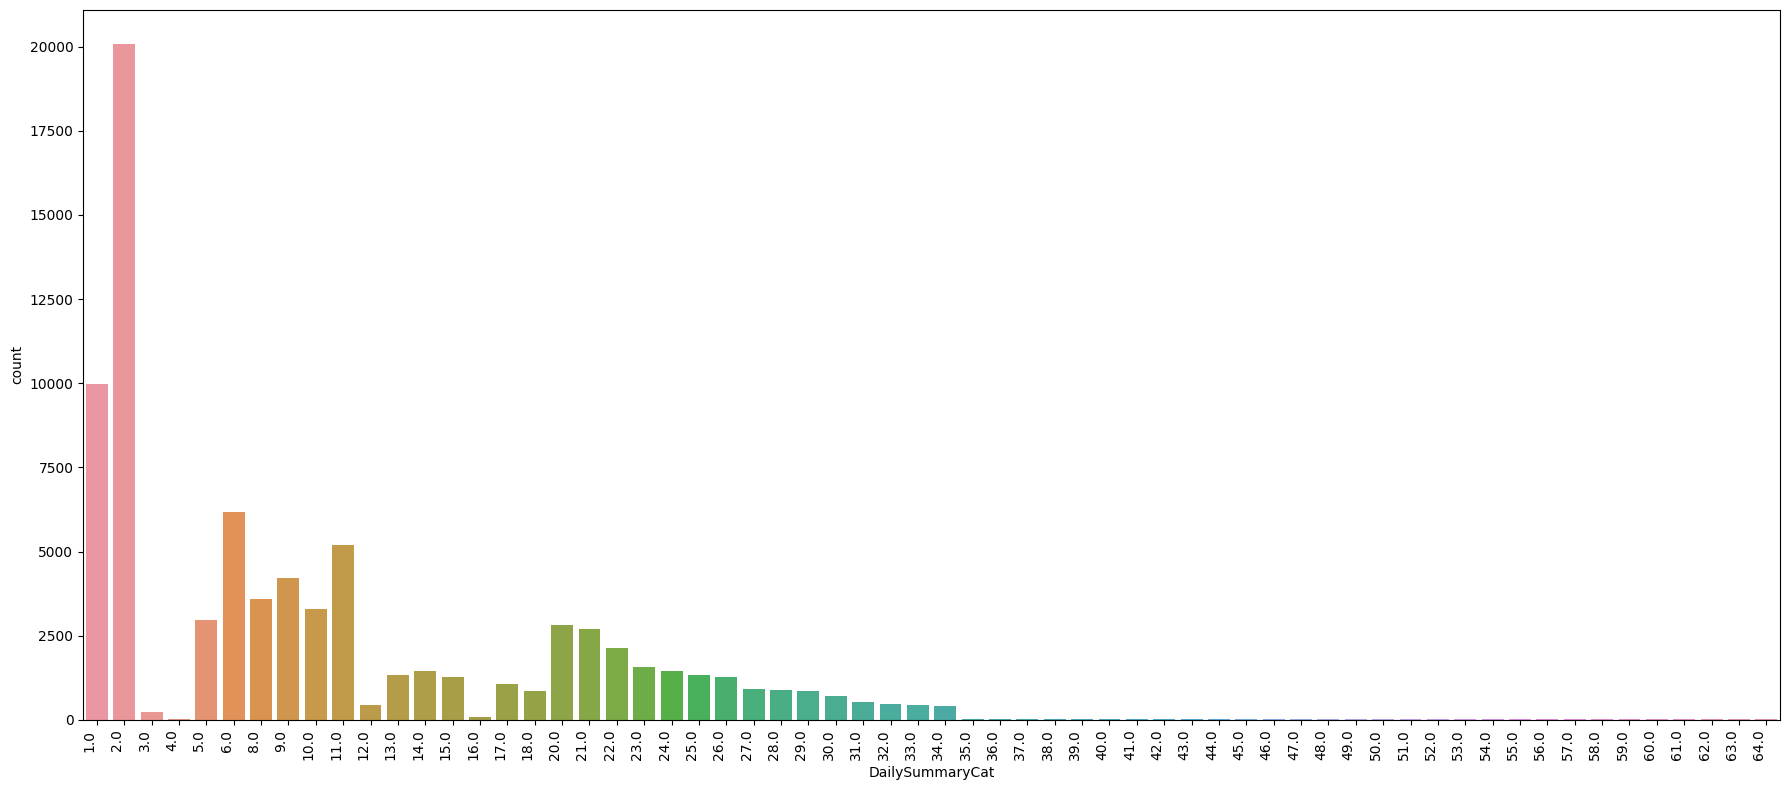

In [ ]:
plt.figure(figsize=(18,8))
ax = sns.countplot(x=data['DailySummaryCat'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
def change_category(Summary):
    if Summary=='Partly Cloudy':
        return 1
    elif Summary=='Mostly Cloudy':
        return 1
    elif Summary=='Foggy':
        return 3
    elif Summary=='Clear':
        return 4
    elif Summary=='Overcast':
        return 5
    elif Summary=='Breezy and Overcast':
        return 5
    elif Summary=='Breezy and Partly Cloudy':
        return 1
    elif Summary=='Breezy and Mostly Cloudy':
        return 1
    elif Summary=='Dry and Partly Cloudy':
        return 1
    elif Summary=='Windy and Partly Cloudy':
        return 1
    elif Summary=='Light Rain':
        return 5
    elif Summary=='Breezy':
        return 4
    elif Summary=='Windy and Overcast':
        return 5
    elif Summary=='Humid and Mostly Cloudy':
        return 1
    elif Summary=='Drizzle':
        return 3
    elif Summary=='Windy and Mostly Cloudy':
        return 1
    elif Summary=='Breezy and Foggy':
        return 3
    elif Summary=='Dry':
        return 4
    elif Summary=='Humid and Partly Cloudy':
        return 1
    elif Summary=='Dry and Mostly Cloudy':
        return 5
    elif Summary=='Rain':
        return 5
    elif Summary=='Windy':
        return 4
    elif Summary=='Humid and Overcast':
        return 5
    elif Summary=='Windy and Foggy':
        return 3
    elif Summary=='Dangerously Windy and Partly Cloudy':
        return 1
    elif Summary=='Windy and Dry':
        return 4
    elif Summary=='Breezy and Dry':
        return 4

In [ ]:
data['SummaryCat'] = data['Summary'].apply(change_category)

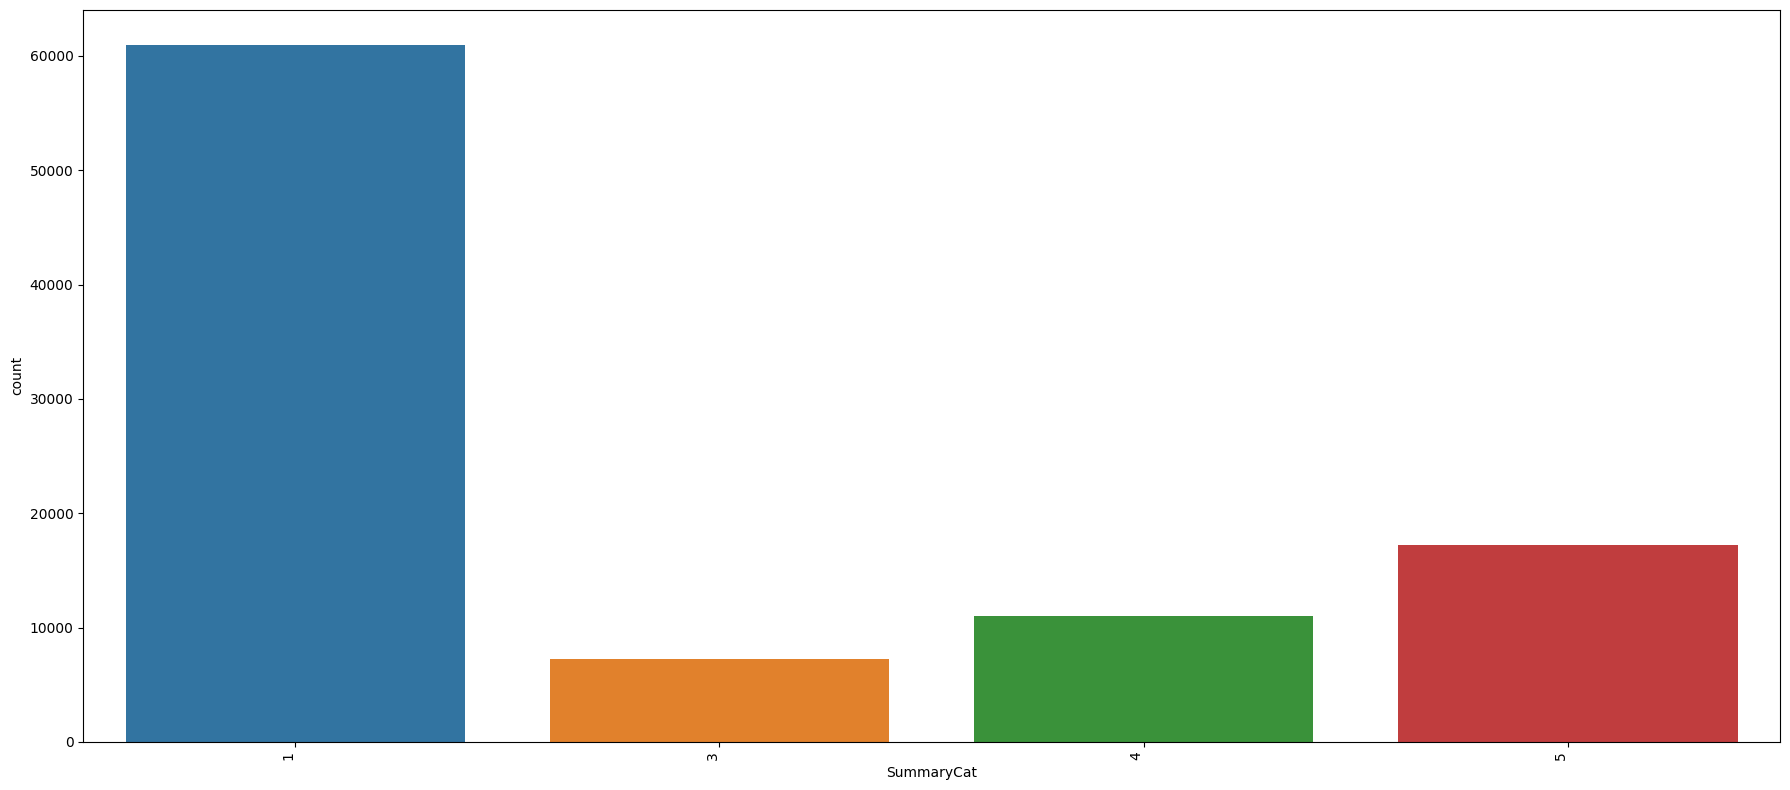

In [ ]:
plt.figure(figsize=(18,8))
ax = sns.countplot(x=data['SummaryCat'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
def change_category(PrecipTypeCat):
    if PrecipTypeCat=='rain':
        return 1
    elif PrecipTypeCat=='snow':
        return 2

In [ ]:
data['PrecipTypeCat'] = data['Precip Type'].apply(change_category)

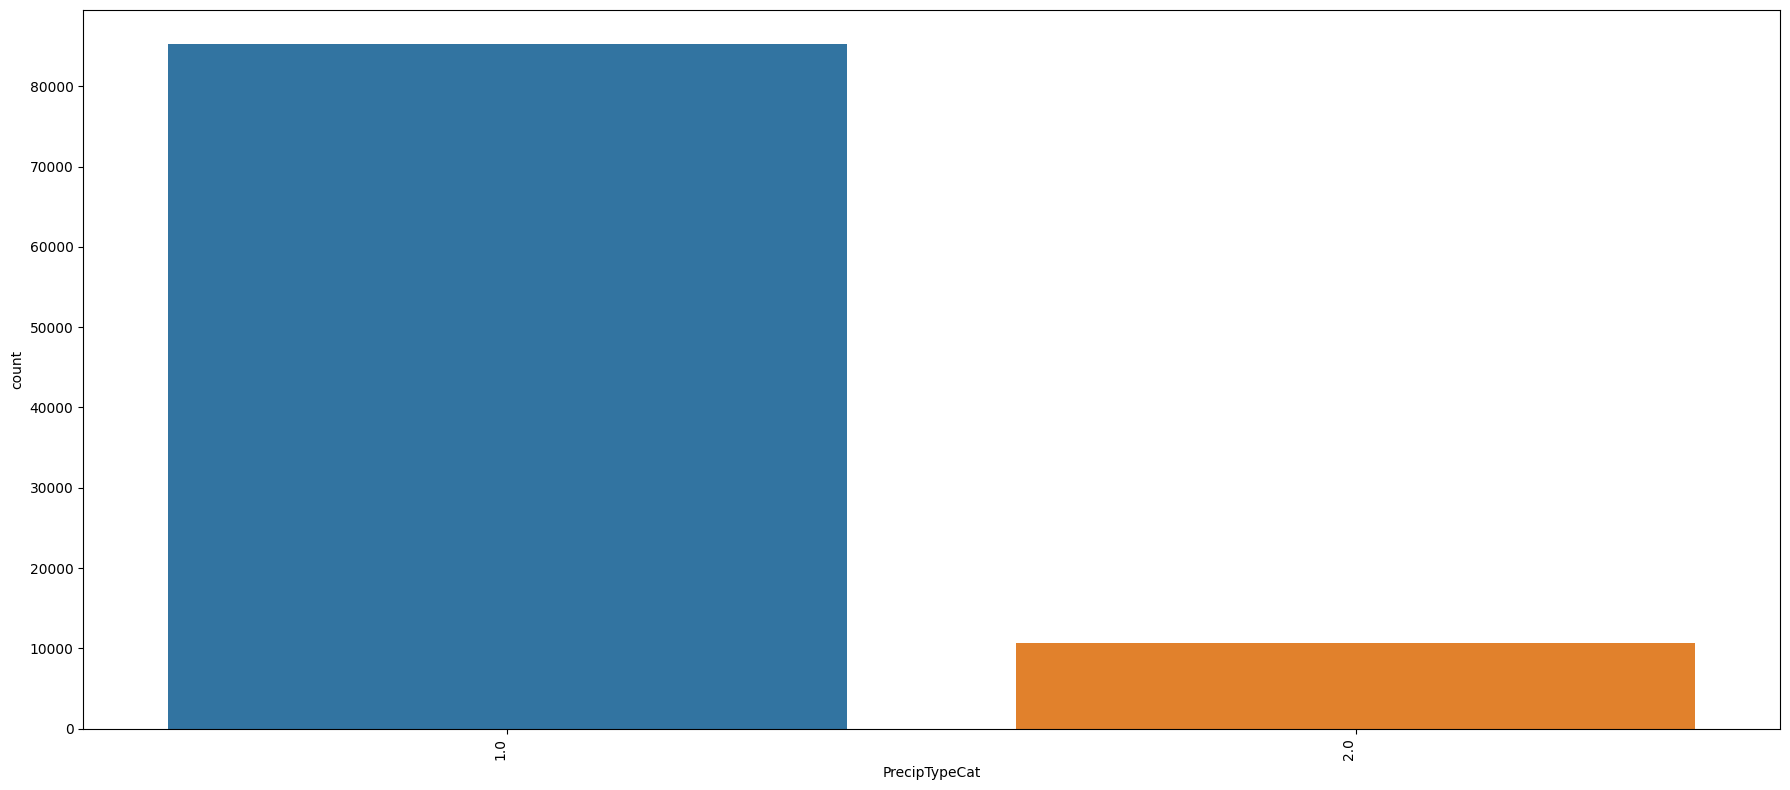

In [ ]:
plt.figure(figsize=(18,8))
ax = sns.countplot(x=data['PrecipTypeCat'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
data.drop(['Formatted Date','Summary','Daily Summary','Precip Type','Date'],axis=1,inplace=True)
data.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),year,month,day,hour,DailySummaryCat,SummaryCat,PrecipTypeCat
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,2006,4,1,0,1.0,1,1.0
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,2006,4,1,1,1.0,1,1.0
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,2006,4,1,2,1.0,1,1.0
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,2006,4,1,3,1.0,1,1.0
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,2006,4,1,4,1.0,1,1.0


In [ ]:
data = data.fillna(method="ffill")

In [ ]:
#Veri setinde hedef ve girdileri ayırdık.
X = data.drop('DailySummaryCat', axis=1)
X = X.drop('SummaryCat', axis=1)
y = data['SummaryCat']

**RandomForest**

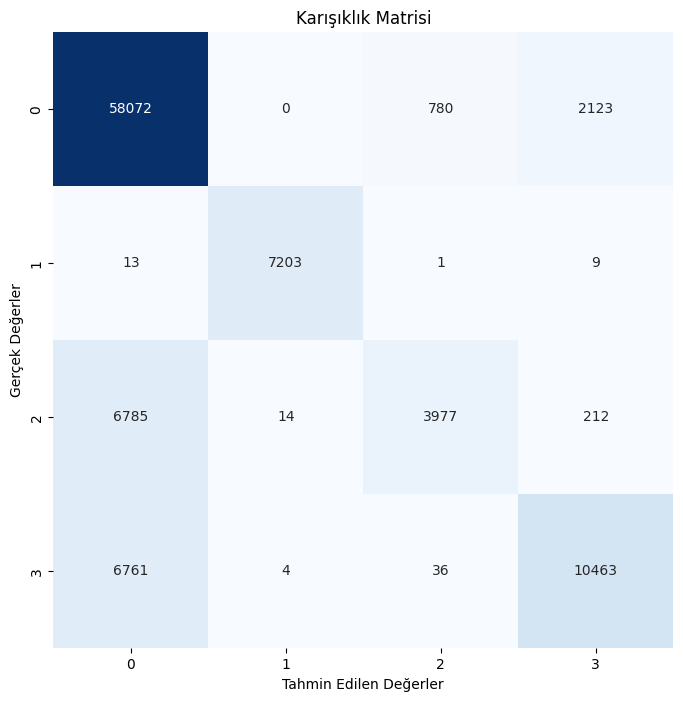

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Veri setinizi yükleyin (X: özellikler, y: hedef değişken)
# Örnek olarak X ve y'nin nasıl tanımlandığına göre kodu ayarlayabilirsiniz

# Decision Tree sınıflandırıcı modelini oluşturun
model = RandomForestClassifier()

# K-fold çapraz doğrulama için KFold nesnesini oluşturun
k_fold = KFold(n_splits=20, shuffle=True, random_state=42)  # 20 katlı çapraz doğrulama

# K-fold çapraz doğrulama ile tahminleri elde etmek için cross_val_predict kullanın
y_pred = cross_val_predict(model, X, y, cv=k_fold)

# Karışıklık matrisini oluşturun
conf_matrix = confusion_matrix(y, y_pred)

# Görselleştirme için seaborn kütüphanesi kullanarak heatmap çizdirin
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Tahmin Edilen Değerler')
plt.ylabel('Gerçek Değerler')
plt.title('Karışıklık Matrisi')
plt.show()

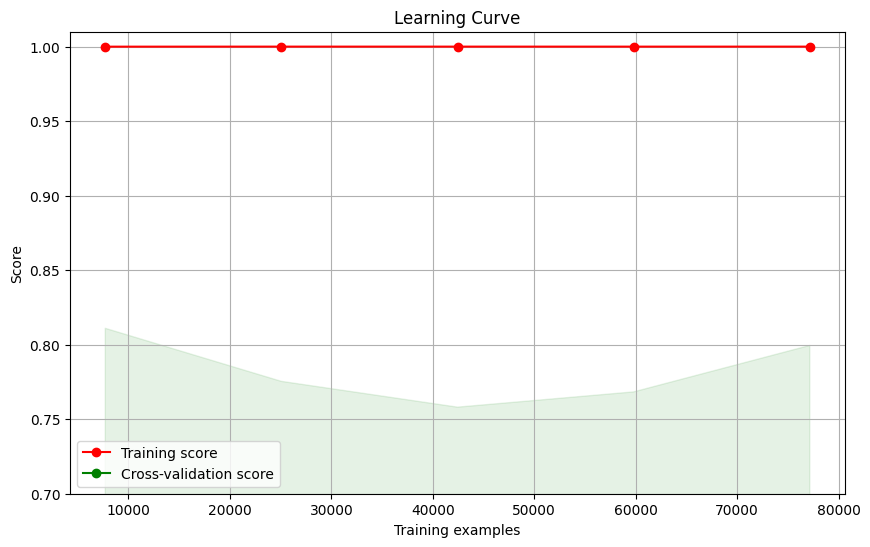

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Assuming you have features 'X' and labels 'y'

# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot the learning curve for RandomForestClassifier
plot_learning_curve(RandomForestClassifier(), "Learning Curve", X, y, ylim=(0.7, 1.01), cv=5, n_jobs=-1)

plt.show()


In [ ]:
# Karışıklık matrisinde doğru tahminlerin toplamını bulma
correct_predictions = conf_matrix.diagonal().sum()

# Toplam veri sayısını bulma
total_samples = conf_matrix.sum()

# Doğruluk oranını hesaplama
accuracy = correct_predictions / total_samples

# Yüzde cinsinden doğruluk oranını yazdırma
print(f"Doğruluk Oranı: {accuracy * 100:.2f}%")

Doğruluk Oranı: 82.65%


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score



# Hassasiyet (precision), Geri çağrı (recall) ve F-score değerlerini hesaplayın
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f_score = f1_score(y, y_pred, average='weighted')

# F-score değerini yüzde olarak hesaplayın
f_score_percentage = f_score * 100
precision = precision * 100
recall = recall * 100
print(f"Hassasiyet (Precision): {precision:.2f}%")
print(f"Geri Çağrı (Recall): {recall:.2f}%")
print(f"F-score Yüzdesi: {f_score_percentage:.2f}%")



Hassasiyet (Precision): 82.80%
Geri Çağrı (Recall): 82.65%
F-score Yüzdesi: 81.04%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


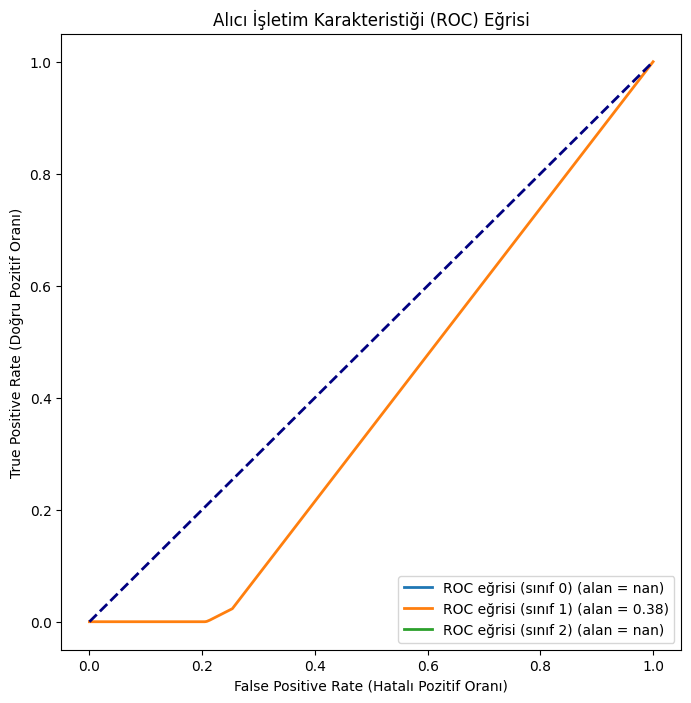

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Tahmin edilen olasılıklarınız varsa
y_pred_prob = model.predict_proba(X)

# Etiketleri ikili hale getirin
y_bin = label_binarize(y, classes=[0, 1, 2])  # Gerçek etiketlere göre sınıfları ayarlayın


# Her bir sınıf için ROC eğrisini ve eğri altındaki alanı hesaplayın
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(y_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


# Her bir sınıf için ROC eğrisini çizin
plt.figure(figsize=(8, 8))
for i in range(y_bin.shape[1]):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC eğrisi (sınıf {i}) (alan = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (Hatalı Pozitif Oranı)')
plt.ylabel('True Positive Rate (Doğru Pozitif Oranı)')
plt.title('Alıcı İşletim Karakteristiği (ROC) Eğrisi')
plt.legend(loc='lower right')
plt.show()


**Decision Tree**

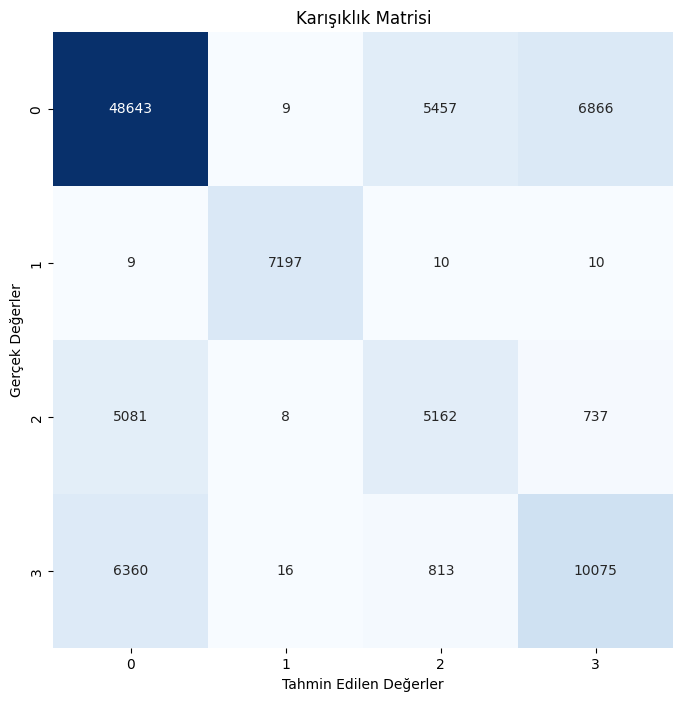

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Veri setinizi yükleyin (X: özellikler, y: hedef değişken)
# Örnek olarak X ve y'nin nasıl tanımlandığına göre kodu ayarlayabilirsiniz

# Decision Tree sınıflandırıcı modelini oluşturun
model = DecisionTreeClassifier()

# K-fold çapraz doğrulama için KFold nesnesini oluşturun
k_fold = KFold(n_splits=20, shuffle=True, random_state=42)  # 20 katlı çapraz doğrulama

# K-fold çapraz doğrulama ile tahminleri elde etmek için cross_val_predict kullanın
y_pred = cross_val_predict(model, X, y, cv=k_fold)

# Karışıklık matrisini oluşturun
conf_matrix = confusion_matrix(y, y_pred)

# Görselleştirme için seaborn kütüphanesi kullanarak heatmap çizdirin
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Tahmin Edilen Değerler')
plt.ylabel('Gerçek Değerler')
plt.title('Karışıklık Matrisi')
plt.show()

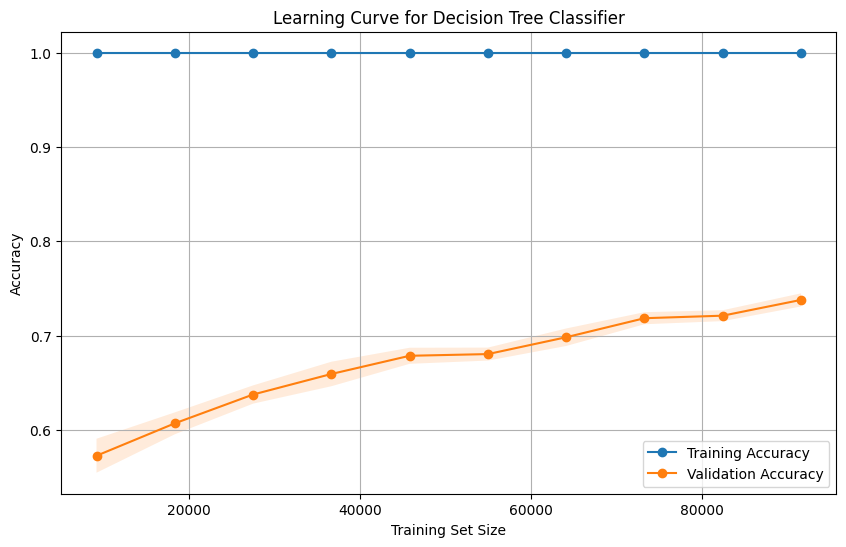

In [ ]:
import numpy as np
from sklearn.model_selection import learning_curve

# Vary the training set sizes
train_sizes, train_scores, val_scores = learning_curve(
    model, X, y, cv=k_fold, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

# Calculate mean and standard deviation of training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, val_mean, label='Validation Accuracy', marker='o')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.15)
plt.title('Learning Curve for Decision Tree Classifier')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Karışıklık matrisinde doğru tahminlerin toplamını bulma
correct_predictions = conf_matrix.diagonal().sum()

# Toplam veri sayısını bulma
total_samples = conf_matrix.sum()

# Doğruluk oranını hesaplama
accuracy = correct_predictions / total_samples

# Yüzde cinsinden doğruluk oranını yazdırma
print(f"Doğruluk Oranı: {accuracy * 100:.2f}%")

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Hassasiyet (precision), Geri çağrı (recall) ve F-score değerlerini hesaplayın
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f_score = f1_score(y, y_pred, average='weighted')

# F-score değerini yüzde olarak hesaplayın
f_score_percentage = f_score * 100
precision = precision * 100
recall = recall * 100
print(f"Hassasiyet (Precision): {precision:.2f}%")
print(f"Geri Çağrı (Recall): {recall:.2f}%")
print(f"F-score Yüzdesi: {f_score_percentage:.2f}%")